In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

In [2]:
import os


In [3]:
img = image.load_img(r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\training\Happy People\getty_107808334_121413.jpg")

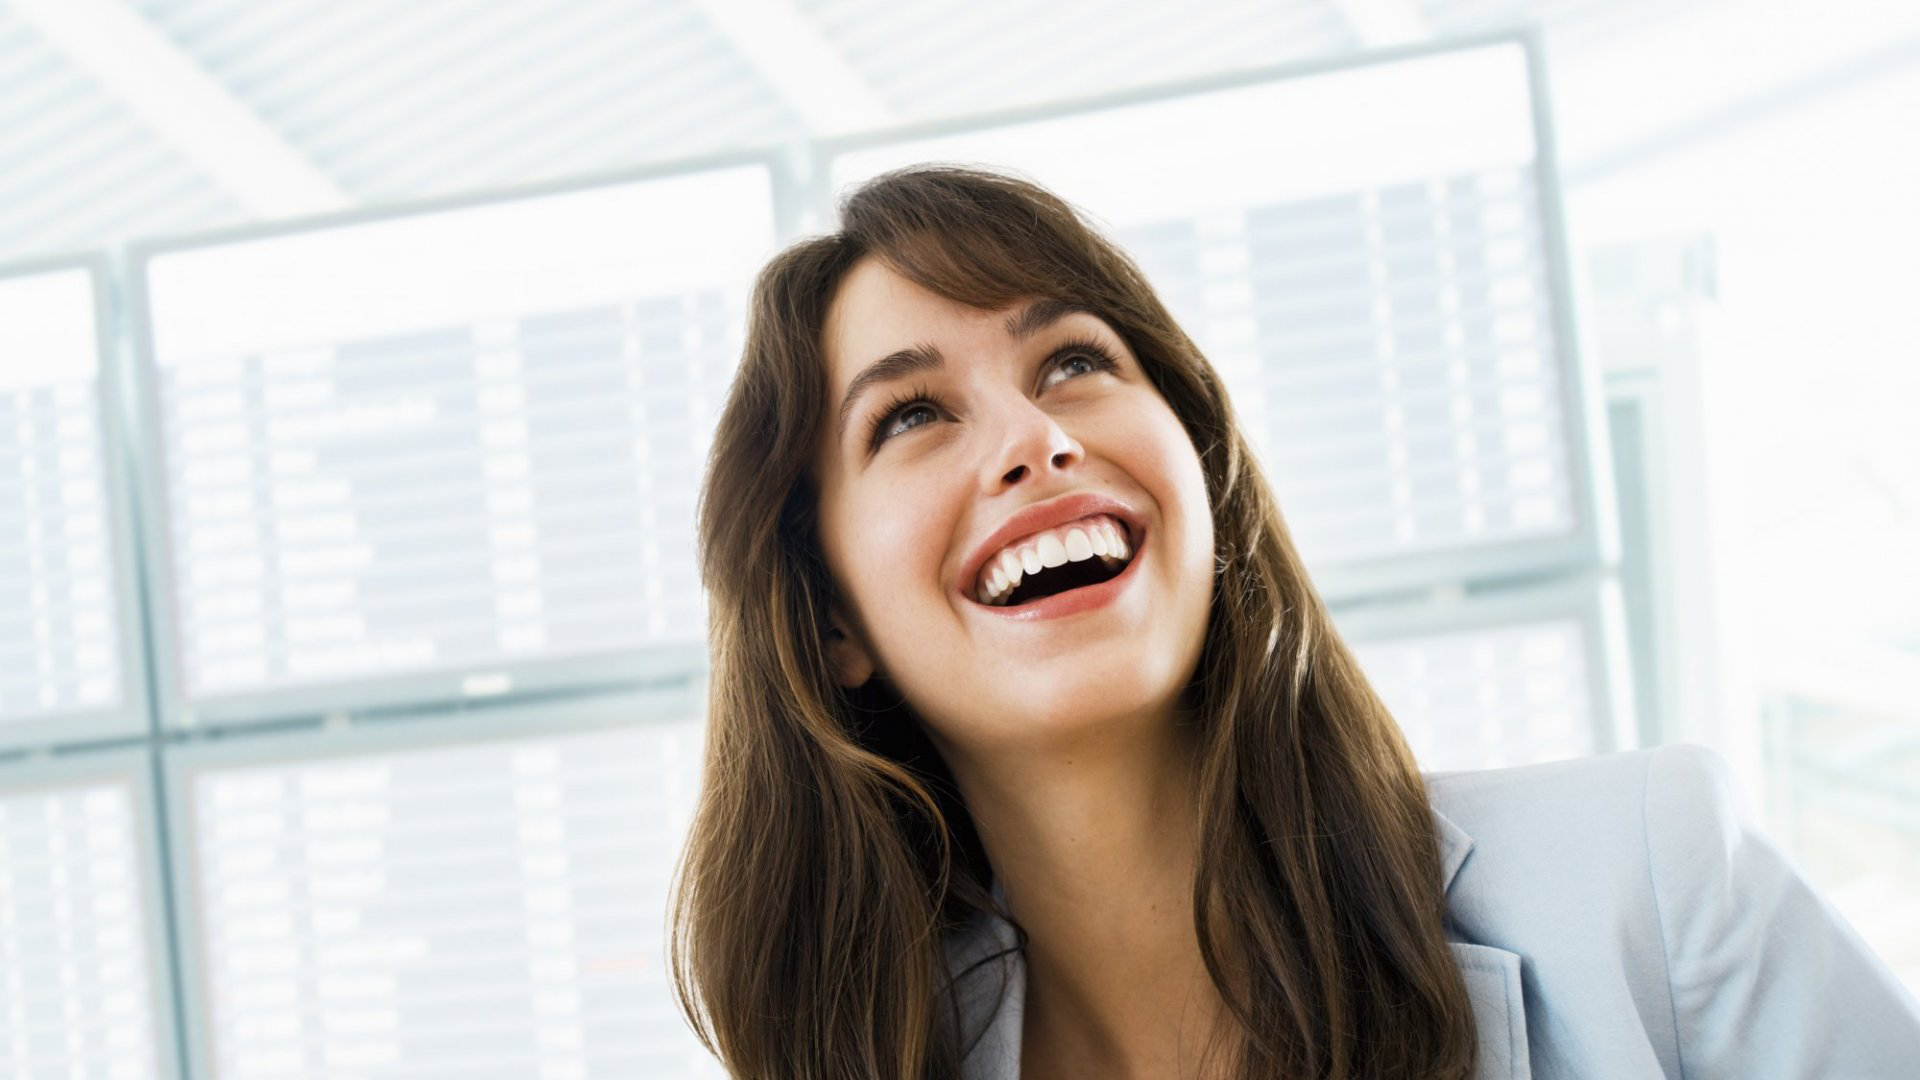

In [4]:
img

In [5]:
i1 = cv2.imread(r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\training\Happy People\getty_107808334_121413.jpg")
i1

array([[[245, 242, 234],
        [245, 242, 234],
        [245, 242, 234],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[244, 241, 233],
        [245, 242, 234],
        [245, 242, 234],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[244, 241, 233],
        [244, 241, 233],
        [245, 242, 234],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[239, 236, 228],
        [239, 236, 228],
        [239, 236, 228],
        ...,
        [192, 184, 171],
        [192, 184, 171],
        [192, 184, 171]],

       [[240, 237, 229],
        [240, 237, 229],
        [240, 237, 229],
        ...,
        [191, 183, 170],
        [191, 183, 170],
        [192, 184, 171]],

       [[240, 237, 229],
        [240, 237, 229],
        [240, 237, 229],
        ...,
        [191, 183, 170],
        [191, 183, 170],
        [191, 183, 170]]

In [20]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\training", target_size = (255,255),batch_size = 32, class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\validation", target_size = (255,255),batch_size = 32, class_mode = 'binary')

Found 350 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [21]:
train_dataset.class_indices

{'Happy People': 0, 'Sad People': 1}

In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [24]:

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [36]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 50,
                     validation_data = validation_dataset)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7904 - loss: 0.4468 - val_accuracy: 0.5000 - val_loss: 0.7385
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7201 - loss: 0.4976 - val_accuracy: 0.5000 - val_loss: 0.6101
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 992ms/step - accuracy: 0.8034 - loss: 0.4131 - val_accuracy: 0.5000 - val_loss: 0.7449
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.7873 - loss: 0.4221 - val_accuracy: 0.5000 - val_loss: 0.6458
Epoch 5/50


c:\Users\anish\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8503 - loss: 0.3407 - val_accuracy: 0.5000 - val_loss: 0.7590
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8372 - loss: 0.3514 - val_accuracy: 1.0000 - val_loss: 0.5176
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8540 - loss: 0.4002 - val_accuracy: 0.5000 - val_loss: 0.7983
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.6771 - loss: 0.5263 - val_accuracy: 1.0000 - val_loss: 0.6201
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 940ms/step - accuracy: 0.9188 - loss: 0.2994 - val_accuracy: 1.0000 - val_loss: 0.5412
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9336 - loss: 0.2321 - val_accuracy: 1.0000 - val_loss: 0.4534
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8698 - loss: 0.3051 - val_accuracy: 0.5000 - val_loss: 1.2787
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 986ms/step - accuracy: 0.6667 - loss: 0.7003 - val_accuracy: 1.0000 - val_loss: 0.5770
Epoch 13/50
3/3

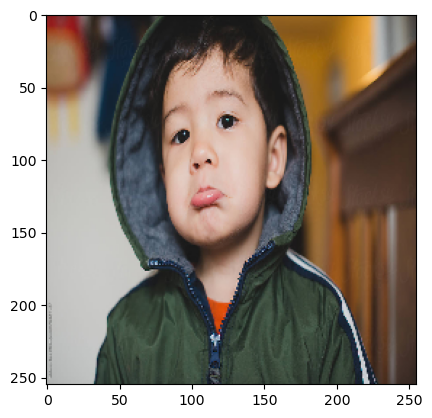

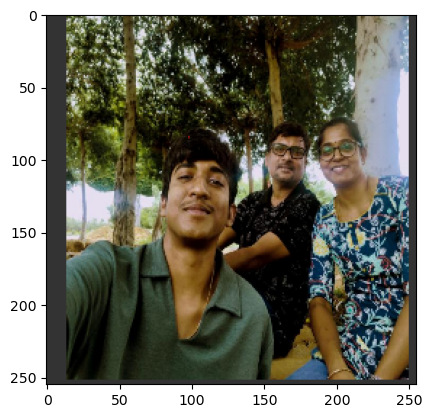

In [37]:
dir_path = r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (255,255))
    plt.imshow(img)
    plt.show()

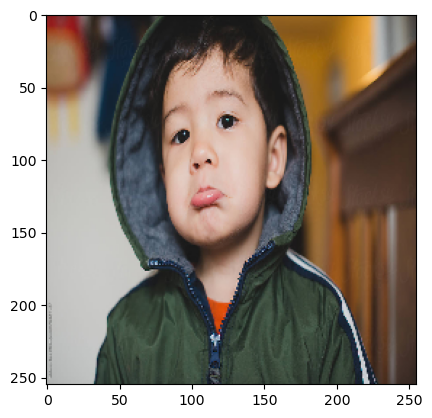

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
 i am happy


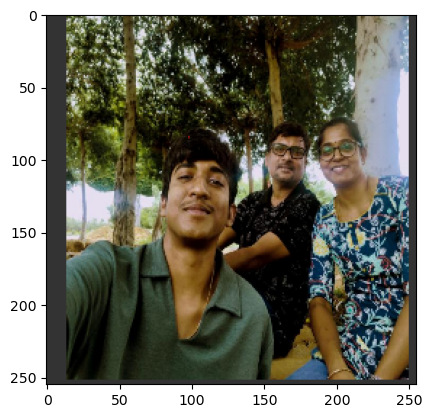

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
 i am happy


In [38]:
dir_path = r"C:\Users\anish\Data Science with Gen AI\Class Codes\Happy vs Sad\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (255,255))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')
        